<a href="https://colab.research.google.com/github/Warlord3097/My-Ridge-Classifier/blob/master/DataMiningProject_Version_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining Term Project - Board Game Geek Rating Prediction¶


# **Abhishek Shinde**
# **Student ID - 1001754842**



Reference Links
1. https://monkeylearn.com/text-classification/
2. https://www.geeksforgeeks.org/applying-multinomial-naive-bayes-to-nlp-problems/

This is the term project for my Data Mining Class.

Due to the large size of the data set, I have divided the dataset into different smaller subsets and have developed my model on those subsets of data as my laptop was not able to handle the computations that came along with the big dataset.

## Overview


Text Classification can be defined as the simple process of assigning tags or categorising data according to its content. One of the most crutial tasks  in this process is Natual Language Processing (NLP) which is widely used in Sentiment Analysis, spam detection and intent detection.


In today's day and age, there is an abundance of data. Data has become an economy and the more smartly one can use it, the more successful they become. This data can be of any format, either textual, numerical, images, etc. Out of these, text data is often considered to be the most rich source of information.

But it is equally challenging and and time consuming to extract valuable information out of all text data. All major businesses are in need of smart decision making algorithms which can help them predict the information needed for them to make a profit for themselves.

Which is why, I am implementing this project as a prime example of how textual data can be, how we perform NLP and other operations, and using different models to predict the accuracy. 
And to also find which model is having better accuracy among the others. 

We shall also cover what improvements can be made to the existing logic so as to improve our data prediction accuracy


# Purpose of this project

The main and foremost objective of this project is to predict the rating for a game, given a textual review.

Other objectives include understanding the mechanisms of text cleaning and NLP. 

Also to understand the working of different classification models.

Amother objective is to develop our presentation skills and documentation skills.


# **So without any further delay, lets begin**

***An understanding of our dataset***

The original Board Game Dataset is a csv file which consists of 1,31,70,703 rows of data. 

This data is a combination of Review, Rating, Users, ID and Game Name.

For the purpose of our project, since our goal is to predict the **Rating** using the given **Review** we will not focus on any other data.




**Note:-** As it is very difficult and out of my system's capabilities to work on such a large dataset at once, we will be dividing our dataset into smaller samples.

They will be explained below.

I have used 3 models for comparison and prediction of our data. They are : 

# **1. Multinomial Naive Bayes Classifier**

The Naive Bayes classifier is a very straightforward probabilistic classifier which has been based on the Bayes Theorem. This classifier assumes strong and very naive independence assumptions.

Bayes theorem calculates probability P(c|x) where c is the class of the possible outcomes and x is the given instance which has to be classified, representing some certain features.

**P(c|x) = P(x|c) * P(c) / P(x)**


Naive Bayes is one of the most common and basic text classification techniques with various applications in Spam Detection, Disaster Tweet Detection, Sentiment Analysis etc. 

Working:
We are given a dataset and we have 11 possible classifications, i.e. The rating of our review can lie between 0 and 10.

Therefore, for a given review,
we first perform various NLP operations such as standardizing the text by converting it all to lower case, removing punctuations, numerical data, special characters, hyperlinks and html tags.

For a better cleaning, we use the NLTK library to remove all the stopwords present in our data.

Stopwords are common words such as "it, is, able, else, and, that" ,etc.

After performing all these text cleaning operations,
we tokenize the words and to find the probability of every word for every rating, starting from 0 to 10.

We use CountVectorizer. It provides a simple and efficient method to tokenize a collection of text documents and to build a vocabulary of known words, while encoding the new documents using that vocabulary.

The CountVectorizer returns a matrix of words and their corresponding occurrences in our dataset, i.e for a word "game" it would also display how many times the word "game" has occurred in the dataset.


We use TfIdfTransformer. It returns a normalized tf-idf representation for a count matrix. It is a common weighing scheme in information retrieval. The goal of using Tf-Idf  instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus. Tf–idf, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

After we get our collection or corpus of words, and have identified their numerical count in all ratings, we use the conditional probability formula of Naive Bayes to Calculate the Probability of a Review by multiplying the probabilities of all the words in the review.

The benefit of using Multinomial Naive-Bayes Classifier is that it can efficiently make predictions when there are multiple possibilities for a class prediction.





# 2. Linear SVM using SGD Training
The SGD Classifier is a Linear Classifier for SVM or Logistic Regression with a Stochastic Gradient Descent Training ( SGD Training )
This trainer helps in implementing regularized linear models with a stochastic gradient descent learning. 

This implementation works with the data represented as dense or sparse arrays of floating point values for the features. The model it fits can be controlled with the loss parameter, while by default, it fits a Linear Support Vector machine (Linear SVM).

SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.  SVM is an algorithm that takes the data as an input and outputs a line that separates those classes if possible. **A hyperplane in an n-dimensional Euclidean space is a flat, n-1 dimensional subset of that space that divides the space into two disconnected parts**. 

# 3. Ridge Classifier
This classifier uses Ridge Regression for its implementation. This classifier first converts the target values into {-1,1} and then treats the problem as a regression task. It performs a multi-output regression in our case as we have multiple classes to predict.


This documentation will explain every code block in a detailed and concise manner

## **Now that we have a better understanding of the different models used in this project, lets start with the programming part of our project**

Here, we mount our google drive and connect it to the colab notebook. Before running this command block, you need to make sure that you have uploaded the dataset on your google drive. This will allow for easy accessing of dataset from colab.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Libraries**

This is where we import all the important libraries which will be needed by us later in the program. 

There is no compulsion to have all your import statements together in one block. It is simply a personal preference if you would like to keep all your import statements together or if you would like to keep them wherever.

In [0]:
import math
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import time
import pickle
import string
import sys
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import os
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

**Reading Dataset File**

Here, after mounting our drive and importing our essential libraries, we read our dataset from our mounted google drive using Pandas, as we want to read the data into our dataframe.

We use the .head() function to display the top 5 records of our dataset. 

As you can see below, we have 5 rows of data, and the column names are also available.

In [4]:
df = pd.read_csv('/content/drive/My Drive/Colab_Data_set/bgg-13m-reviews.csv')
df.head()

,Unnamed: 0,user,rating,comment,ID,name
0,0,sidehacker,10.0,NaN,13,Catan
1,1,Varthlokkur,10.0,NaN,13,Catan
2,2,dougthonus,10.0,"Currently, this sits on my list as my favorite...",13,Catan
3,3,cypar7,10.0,"I know it says how many plays, but many, many ...",13,Catan
4,4,ssmooth,10.0,NaN,13,Catan


**As you know, the scope of our project is to predict the rating, given a review. Therefore, we are only concerned with the columns "rating" and "comment". 

Therefore, we drop the rest of the columns as they would not fit any purpose for our data analysis.
Hence, here, we drop the "ID","user","name" below.

Dropping Column "ID", "user", "name"

In [0]:
dataset = df.drop(columns="ID")
dataset = dataset.drop(columns="user")
dataset = dataset.drop(columns="name")



**Current DataSet**

Here, we can see the modified dataset with only the review and rating column, as desired.

In [6]:
dataset.head()

,Unnamed: 0,rating,comment
0,0,10.0,NaN
1,1,10.0,NaN
2,2,10.0,"Currently, this sits on my list as my favorite..."
3,3,10.0,"I know it says how many plays, but many, many ..."
4,4,10.0,NaN


**Removing all the comments which are empty**

Our dataset consists of 13 million reviews. But many of them(approx. 80%) of them contain empty comments. We can see those empty comments as "NaN" in the "comment" column above.

Since this data is also not essential to us and we wont be able to use it to perform any sort of analysis or prediction,we delete all the rows which have no column value.

In [0]:
#Removing Empty Comments
dataset = dataset.dropna(subset=['comment'])

**Dataset after removing empty comments**

Therefore, after removing all the comments with a "NaN" value, we get the following dataset.

In [8]:
dataset.head()


,Unnamed: 0,rating,comment
2,2,10.0,"Currently, this sits on my list as my favorite..."
3,3,10.0,"I know it says how many plays, but many, many ..."
7,7,10.0,i will never tire of this game.. Awesome
11,11,10.0,This is probably the best game I ever played. ...
16,16,10.0,Fantastic game. Got me hooked on games all ove...


For better exploration of data, this histogram displays the distribution of all the ratings in our dataset againt the number of reviews for each rating.

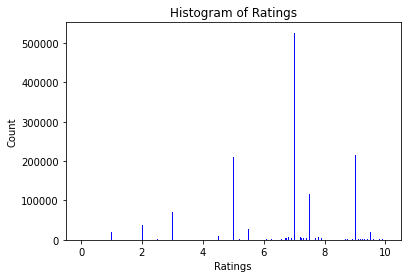

In [9]:
#plot histogram of ratings
num_bins = 500
plt.hist(dataset.rating, num_bins, facecolor='blue', alpha=10)

#plt.xticks(range(9000))
plt.title('Histogram of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

According to the above histogram, we can see that our dataset is heavily unbalanced, i.e. it contains a large majority of reviews which have a sentimentally positive rating that lies between 6 and 8. 


# **Splitting the Dataset into Train and Test Subsets**
Since the Total Dataset is still huge, we split it into Train And Test Set in a 75:25 ratio.

For this operation, we use train_test_split library from Sklearn package.

The train_test_split function is for splitting a single dataset for two different purposes: training and testing. The training subset is for building your model. The testing subset is for using the model on unknown data to evaluate the performance of the model. 
This function makes random partitions for the two subsets.

In [0]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(dataset,test_size = 0.25,random_state=0)

Train Set

In [11]:
train.head()

,Unnamed: 0,rating,comment
8663898,8693932,7.5,"Very good game, but beginning to show it's age..."
8432809,8462320,8.0,Brutal and great.
6429003,6448043,10.0,"Quite thought-provoking, with elements of bluf..."
1762388,1767518,7.0,Decent deckbuilder. Contains some overpowered ...
9155469,9186782,8.0,This game is a lot of fun. I still need to fin...


Our Train Set has a total of 1978317 records

In [12]:
len(train)

1978317

Test Set

In [13]:
test.head()

,Unnamed: 0,rating,comment
11148110,1325432,7.00,Played this one with the developersfor guidanc...
1608883,1613515,7.50,"Great party game, though it can go a bit long ..."
4879202,4893878,3.00,This game is terrible. Generic deckbuilder. It...
3938990,3951044,8.00,This game is awesome! It's our weekly play on ...
6257458,6276087,7.75,"""Overall, Deep Sea Adventure is a lot of fun! ..."


Our Test Set has a total of 659439 records

In [14]:
len(test)

659439

We make a copy of our training set as we are going to make two samples of our training dataset and make development sets from these samples for calculating our model accuracy and performance.

In [0]:
temp_train= train.copy()

The Maximum value of ratings : 

In [16]:
temp_train['rating'].max()

10.0

The Minimum value of ratings :

In [17]:
temp_train['rating'].min()

1.4013e-45

In [18]:
temp_train.head(10)

,Unnamed: 0,rating,comment
8663898,8693932,7.5,"Very good game, but beginning to show it's age..."
8432809,8462320,8.0,Brutal and great.
6429003,6448043,10.0,"Quite thought-provoking, with elements of bluf..."
1762388,1767518,7.0,Decent deckbuilder. Contains some overpowered ...
9155469,9186782,8.0,This game is a lot of fun. I still need to fin...
4228793,4241748,7.0,Lost to flood. Repurchased.
9177209,9208575,10.0,This has got to be the best solitaire game eve...
2177400,2183712,8.0,"This is one of those ""blow my mind"" games. I l..."
6429339,6448379,9.0,Only thing that prevent that game from being a...
6834346,6856042,8.0,I love this game. Really wonderful for couples.


# **For Ease of Computation and High Performance, we further divide our training dataset into two samples**

Here, we split the training set into 2 Sample sets.

These sample sets each have 50 % of the Main Training Set

In [0]:
sample_1,sample_2 = train_test_split(temp_train,test_size=0.5,random_state = 2)

Sample Set 1 :

In [20]:
sample_1.head()

,Unnamed: 0,rating,comment
9231240,9262711,5.10,What I would pay to play a game: $0.25
5312576,5328741,7.00,Lok: BHKJ010602+BHKJ010603
3332539,3341900,6.00,Game in a Nutshell: Escape from a dissolving i...
6019315,6037205,4.00,Almost no real thought or strategy to this gam...
9123220,9154381,6.64,New York Slice is quite same but better.


Sample Set 2 :

In [21]:
sample_2.head()

,Unnamed: 0,rating,comment
5602428,5619246,7.25,I definitely enjoyed this on a first solo play...
10675622,851277,9.00,After many years in my collection this was due...
1800353,1805589,5.50,vendido/cambiado a Torke (labsk) para abaratar...
12874767,3059712,6.10,This is a decent system and the maps are quite...
5406763,5423139,8.00,Storage - Hall 4


# **We now Start Cleaning Our Samples so that we can then use the refined dataset to fit into our models**

In the cleaning process for our text data, we:
1. Remove all Punctuations that are present in our text data.
2. Convert all text data into a standardized LowerCase Text.
3. Removing all the Stopwords from our text data.

Stopwords are a set of commonly used words, irrespective of the language. The main reason for removing Stopwords from our text data is so that if we remove the common words, we will be able to focus on the important words instead.

To import the list of stopwords which we can use to remove them easily, we need to use nltk and download it to our system one time so that we can perform text cleaning without errors.

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Cleaning Sample Set 1

In [23]:
#lowercase and remove punctuation
sample_1['comment'] = sample_1['comment'].str.lower().apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

# stopword list to use
stopwords_list = stopwords.words('english')

"""
Since this is a game dataset review, and since i ran the data cleaning process once before,
i identified a few extra words which can also be added to our stopword list

"""
stopwords_list.extend(('game','play','played','players','player','people','really','board','games','one','plays','cards','would')) 
#remove stopwords
sample_1['comment'] = sample_1['comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_list)]))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


Here we see that 'sample_1' has been cleaned and has been converted to lowercase. 

It also does not have any special characters or any punctuations.

In [24]:
sample_1.head()

,Unnamed: 0,rating,comment
9231240,9262711,5.10,pay 025
5312576,5328741,7.00,lok bhkj010602bhkj010603
3332539,3341900,6.00,nutshell escape dissolving island securing spo...
6019315,6037205,4.00,almost real thought strategy aside randomly pi...
9123220,9154381,6.64,new york slice quite better


Cleaning Sample Set 2

In [25]:
#lowercase and remove punctuation
sample_2['comment'] = sample_2['comment'].str.lower().apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

#remove stopwords
sample_2['comment'] = sample_2['comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_list)]))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Here is the cleaned 'sample_2'

In [26]:
sample_2.head()

,Unnamed: 0,rating,comment
5602428,5619246,7.25,definitely enjoyed first solo dont feel good e...
10675622,851277,9.00,many years collection due raise rating well wo...
1800353,1805589,5.50,vendidocambiado torke labsk para abaratar el m...
12874767,3059712,6.10,decent system maps quite attractive moreover s...
5406763,5423139,8.00,storage hall 4


We now divide each sample into a train and a development set so that we can test the accuracy of our models

We divide the sample set into a ratio of 80:20

In [0]:
#Splitting Sample 1 
sample_1_train, sample_1_dev = train_test_split(sample_1,test_size=0.2,random_state = 0)

#Splitting Sample 2
sample_2_train, sample_2_dev = train_test_split(sample_2,test_size=0.2,random_state = 0)

Train Set for Sample 1

In [28]:
sample_1_train.head()

,Unnamed: 0,rating,comment
12116269,2298134,4.0,nice puzzle solve every round nothing actually...
5509587,5526202,8.0,mind must collectively determine correct playi...
11216181,1393660,8.0,fabulous hard solo historical element makes ci...
9927886,96504,6.5,well ok yet another nice euro thing bothers it...
11367944,1546076,5.0,stupid ballstothewall ameritrash something fee...


Development Set for Sample 1

In [29]:
sample_1_dev.head()

,Unnamed: 0,rating,comment
1966784,1972447,8.0,first true owned bought edition 3 year old son...
8796219,8826736,7.5,first impression
13082523,3268462,2.0,multiple times friends dont enjoy basically si...
10726210,901969,6.0,enjoyable pickupanddeliver card seems bit shor...
9300056,9331654,3.0,20130601 knizia új absztrakt játéka minden kör...


Train Set for Sample 2

In [30]:
sample_2_train.head()

,Unnamed: 0,rating,comment
9172738,9204096,5.0,totally random sometimes thats okay
8914428,8945143,8.0,challenging hero counterpart villain teams gre...
10488580,662509,6.0,like hasnt hit table years
11022416,1199410,6.0,fast enough elimination isnt huge deal
4301601,4314725,9.0,24p best 2 rated 8 initial several things wron...


Development Set for Sample 2

In [31]:
sample_2_dev.head()

,Unnamed: 0,rating,comment
11987216,2168420,7.0,good start anyone looking orks space marines g...
6979313,7002855,8.0,bought le valet de coeur june 7 2009 42951000
8531220,8560931,10.0,backed kickstarter made pnp files hundred far ...
4237888,4250863,8.0,lot better 2nd 3rd came years later first pay ...
10697206,872907,6.0,great addition fluxx family additional powers ...


## **We make x and y train sets for both our samples**

Creating Train X, Train Y ,  Dev X and Dev Y for Sample 1

In [0]:
#Training X and Y for Sample 1
train_1x=[]
for i in sample_1_train['comment']:
    train_1x.append(i)

train_1y=[]
for i in sample_1_train['rating']:
    train_1y.append(i)

dev_1x=[]
for i in sample_1_dev['comment']:
    dev_1x.append(i)

dev_1y=[]
for i in sample_1_dev['rating']:
    dev_1y.append(i)

Creating Train X, Train Y ,  Dev X and Dev Y for Sample 2

In [0]:
#Training X and Y for Sample 2
train_2x=[]
for i in sample_2_train['comment']:
    train_2x.append(i)

train_2y=[]
for i in sample_2_train['rating']:
    train_2y.append(i)

dev_2x=[]
for i in sample_2_dev['comment']:
    dev_2x.append(i)

dev_2y=[]
for i in sample_2_dev['rating']:
    dev_2y.append(i)

Therefore, our current Train and Development Sets for Sample 1 (first 5 records)  are:

In [34]:
train_1x[:5]

['nice puzzle solve every round nothing actually convince',
 'mind must collectively determine correct playing numbered possess 1 100 without giving clues quite difficult although use lives reveal next highest set whilst successes grant extra lives failure rarely ends well good laugh collective insight reading tics clearly great ell know fellow',
 'fabulous hard solo historical element makes civil war nothing suspect highly rated',
 'well ok yet another nice euro thing bothers itd want feld isnt',
 'stupid ballstothewall ameritrash something feels like missing decisions thin story element isnt strong even silly like betrayal house hill utterly horrible im sure im convinced']

In [35]:
train_1y[:5]

[4.0, 8.0, 8.0, 6.5, 5.0]

In [36]:
dev_1x[:5]

['first true owned bought edition 3 year old son day try',
 'first impression',
 'multiple times friends dont enjoy basically sillystupid things ie dorky seeing dont like dorky things dont enjoy',
 'enjoyable pickupanddeliver card seems bit shortrushed 4p go deck poaching cubes lot different rrtrotw cannot connect cities originate different spokes starting roundhouse spoke becomes island track connected islands roundhouse seems translate cubepoaching becoming takeonefortheteam situation must use short 13 link rail lines poach cubes instead able use preferred long rail line overall seems become solitaire situation extend long rail lines hope lucky high value cube draws bagofcubes build new city end line im anxious try 2 3',
 '20130601 knizia új absztrakt játéka minden körben három elemből választva városokat építünk 3 színben ahol kettő vagy nagyobb város alakul ki egy színből rárakhatjuk egy épületünket kiemelt részt elérve annak négy oldalán legtöbb befolyással rendelkező szintén lera

In [37]:
dev_1y[:5]

[8.0, 7.5, 2.0, 6.0, 3.0]

And our current Train and Development Sets for Sample 2 (first 5 records) are:

In [38]:
train_2x[:5]

['totally random sometimes thats okay',
 'challenging hero counterpart villain teams great combos introduce mechanics werent implemented secret wars',
 'like hasnt hit table years',
 'fast enough elimination isnt huge deal',
 '24p best 2 rated 8 initial several things wrong usual upped 9 5 gifted wendy birthday received 12414 traded sale la isla february 2018 received innovation deluxe includes 4 expansions christmas 2017 technically still different version future beyond 154 starting 122517 recorded entry']

In [39]:
train_2y[:5]

[5.0, 8.0, 6.0, 6.0, 9.0]

In [40]:
dev_2x[:5]

['good start anyone looking orks space marines great amount figures price',
 'bought le valet de coeur june 7 2009 42951000',
 'backed kickstarter made pnp files hundred far every love wants yesterday got actual love quality feel components',
 'lot better 2nd 3rd came years later first pay special attention rules tech misunderstanding make way unbalanced',
 'great addition fluxx family additional powers keeper allows little deeper strategy fluxx certainly aged household son old enough moved onto complex']

In [41]:
dev_2y[:5]

[7.0, 8.0, 10.0, 8.0, 6.0]

Here we perform Text Cleaning Again. This is an optional Step. We aim to also clean out any and all numerical values present in our data samples as well.


**This is an optional step**

The Functions below remove all special characters and numerical values along with html tags and line spaces and numerical values. We also standardize the comments by converting all text to lowercase.

In [0]:
#Text Cleaning
def TextClean(data):
    
    txt = []
    for T in data:
        T = re.sub(r'@[A-Za-z0-9_]+','',T)
        T = re.sub(r"http\S+", "", T)
        T = T.replace('<br />', '')
        T = T.replace("\'","")
        T = T.replace("?'","")
        T = T.replace("*", "")
        T = T.replace("/", "")
        T = T.replace("\ ", "")
        T = T.replace(".", "")
        T = T.replace("(", "")
        T = T.replace(")", "")
        T = T.replace(":", "")
        T = T.replace('"', "")
        T = T.replace(",", "")
        T = T.replace("!", "")
        T = T.replace("'", "")
        T = T.replace("&", "")
        T = re.sub(r"[0-9]*", "", T)
        T = re.sub(r"(”|“|-|\+|`|#|,|;|\|/|\\|)*","", T)
        T = re.sub(r"&amp","", T)
        T = T.lower()
        txt.append(T)
    return txt


#Removing Special Characters
def Remove_SC(text):
    alphabet = []
    alpha = 'a'
    for i in range(0, 26): 
        alphabet.append(alpha) 
        alpha = chr(ord(alpha) + 1)
    l = []
    for i in text:
        txt = []
        t = i.split(' ')
        for j in t:
            m = j
            for k in m:
                if k not in alphabet:
                    m = m.replace(k, '')
            if m != '':
                txt.append(m)
        #l.append(txt)
        s = ''
        for j in txt:
            s = s + j + ' '
        l.append(s)
    return l

Cleaning the Train and Development Sets for Sample 1

In [0]:
#Cleaning Sample 1 Train Sets and Development Sets
#Execution takes 120 seconds

#Clean Text and Remove Numerical Values 
train_1x = TextClean(train_1x)
dev_1x   = TextClean(dev_1x)
#Remove Special Characters
train_1x = Remove_SC(train_1x)
dev_1x = Remove_SC(dev_1x)

### As we can see now, we do not have any numerical value in our dataset as well. This means that our data is now completely clean and ready to be fit into the models.

After Cleaning and Removing Special Characters, the Train and Development Sets for Sample 1 (first 5 records) are : 

In [44]:
train_1x[:5]

['nice puzzle solve every round nothing actually convince ',
 'mind must collectively determine correct playing numbered possess without giving clues quite difficult although use lives reveal next highest set whilst successes grant extra lives failure rarely ends well good laugh collective insight reading tics clearly great ell know fellow ',
 'fabulous hard solo historical element makes civil war nothing suspect highly rated ',
 'well ok yet another nice euro thing bothers itd want feld isnt ',
 'stupid ballstothewall ameritrash something feels like missing decisions thin story element isnt strong even silly like betrayal house hill utterly horrible im sure im convinced ']

In [45]:
dev_1x[:5]

['first true owned bought edition year old son day try ',
 'first impression ',
 'multiple times friends dont enjoy basically sillystupid things ie dorky seeing dont like dorky things dont enjoy ',
 'enjoyable pickupanddeliver card seems bit shortrushed p go deck poaching cubes lot different rrtrotw cannot connect cities originate different spokes starting roundhouse spoke becomes island track connected islands roundhouse seems translate cubepoaching becoming takeonefortheteam situation must use short link rail lines poach cubes instead able use preferred long rail line overall seems become solitaire situation extend long rail lines hope lucky high value cube draws bagofcubes build new city end line im anxious try ',
 'knizia j absztrakt jtka minden krben hrom elembl vlasztva vrosokat ptnk sznben ahol kett vagy nagyobb vros alakul ki egy sznbl rrakhatjuk egy pletnket kiemelt rszt elrve annak ngy oldaln legtbb befolyssal rendelkez szintn lerakhat egy plett cl minl hamarabb letenni az ad

In [0]:
#Cleaning Sample 2 Train Sets and Development Sets
#Execution takes 120 seconds
#Clean Text
train_2x = TextClean(train_2x)
dev_2x   = TextClean(dev_2x)
#Remove Special Characters
train_2x = Remove_SC(train_2x)
dev_2x = Remove_SC(dev_2x)

After Cleaning and Removing Special Characters, the Train and Development Sets for Sample 2 (first 5 records) are : 

In [47]:
train_2x[:5]

['totally random sometimes thats okay ',
 'challenging hero counterpart villain teams great combos introduce mechanics werent implemented secret wars ',
 'like hasnt hit table years ',
 'fast enough elimination isnt huge deal ',
 'p best rated initial several things wrong usual upped gifted wendy birthday received traded sale la isla february received innovation deluxe includes expansions christmas technically still different version future beyond starting recorded entry ']

In [48]:
dev_2x[:5]

['good start anyone looking orks space marines great amount figures price ',
 'bought le valet de coeur june ',
 'backed kickstarter made pnp files hundred far every love wants yesterday got actual love quality feel components ',
 'lot better nd rd came years later first pay special attention rules tech misunderstanding make way unbalanced ',
 'great addition fluxx family additional powers keeper allows little deeper strategy fluxx certainly aged household son old enough moved onto complex ']

# **Rounding off Rating Values**

**In our dataset, we know that there are ratings in the float format, i.e. they have decimal values as well.**

**If we use these decimal values as they are for prediction, we will end up with more than 10 classes as it will consider every unique rating as a seperate class. Therefore, we will round off all rating values in our sample sets so that we can identity the classes easily, as we will get all the values in whole numbers, without any decimal value.**

In [0]:
#Rounding Rating Values for : 
#Training And Development Set for Sample 1

train_1y  = [round(num) for num in train_1y]
dev_1y    = [round(num) for num in dev_1y]

#Training And Development Set for Sample 2

train_2y  = [round(num) for num in train_2y]
dev_2y    = [round(num) for num in dev_2y]



---



---



Since, we now have both the cleaned data and the rounded ratings, we will now fit our models with the training data and calculate the accuracy.

## We now fit our training data into the Multinomial NaiveBayes Classifier and Predict the Development Set

Calculating Accuracy for the Development Set of Sample 1


In [50]:
#Takes 30 seconds to execute
nb_1 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
#Fitting Training Set to Model
nb_1.fit(train_1x,train_1y)
#Prediction
y_pred = nb_1.predict(dev_1x)
#Predicting For Development Set 1
print("Accuracy of Multinomial Naive-Bayes Classifier for Sample 1 :", accuracy_score(dev_1y, y_pred)*100," %")


Accuracy of Multinomial Naive-Bayes Classifier for Sample 1 : 30.30702818553116  %


Calculating Accuracy for the Development Set of Sample 2

In [51]:
#Takes 30 seconds to execute
nb_2 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
#Fitting Training Set to Model
nb_2.fit(train_2x,train_2y)
#Prediction
y_pred = nb_2.predict(dev_2x)
#Predicting For Development Set 2
print("Accuracy of Multinomial Naive-Bayes Classifier for Sample 2 :", accuracy_score(dev_2y, y_pred)*100," %")

Accuracy of Multinomial Naive-Bayes Classifier for Sample 2 : 30.147296696186665  %


So we have got the accuracy of our Multinomial Naive Bayes Classifier to be around 30 % which is not bad at all, given that we are using 20% of the entire dataset and are using a subset of that dataset for our model execution.

## We now fit our training data into the Linear SVM Classifier and Predict the Development Set

In [52]:
#Takes 1 minute to execute
sgd_clf_1 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf',
  SGDClassifier(penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None)),])
#Fitting Model 
sgd_clf_1.fit(train_1x,train_1y)
#Prediction
y_pred = sgd_clf_1.predict(dev_1x)
#Predicting For Development Set 1
print("Accuracy of Linear SVM Classifier for Sample 1 :", accuracy_score(dev_1y, y_pred)*100," %")

Accuracy of Linear SVM Classifier for Sample 1 : 25.813316349225605  %


Calculating Accuracy for the Development Set of Sample 2

In [53]:
#Takes 1 minute to execute
sgd_clf_2 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', 
  SGDClassifier(penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None)),])
#Fitting Model 
sgd_clf_2.fit(train_2x,train_2y)
#Prediction
y_pred = sgd_clf_2.predict(dev_2x)
#Predicting For Development Set 2
print("Accuracy of Linear SVM Classifier for Sample 2 :", accuracy_score(dev_2y, y_pred)*100," %")

Accuracy of Linear SVM Classifier for Sample 2 : 26.562942294472077  %


For our Linear SVM Classifier, we have achieved an accuracy of ~26% which is not too bad. But it proves that Naive Bayes is the better among the two.

## We now fit our training data into the Ridge Classifier and Predict the Development Set

Calculating Accuracy for the Development Set of Sample 1

In [54]:
#This Code takes 230 seconds to execute
tridge_clf_1 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf',RidgeClassifier()),])
tridge_clf_1.fit(train_1x,train_1y)

y_pred = tridge_clf_1.predict(dev_1x)
#Predicting For Development Set 1
print("Accuracy of Ridge Classifier for Sample 1  :", accuracy_score(dev_1y, y_pred)*100," %")

Accuracy of Ridge Classifier for Sample 1  : 31.3134376642808  %


Calculating Accuracy for the Development Set of Sample 2

In [55]:
#This Code takes 230 seconds to execute
tridge_clf_2 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf',RidgeClassifier()),])
tridge_clf_2.fit(train_2x,train_2y)

y_pred = tridge_clf_2.predict(dev_2x)
#Predicting For Development Set 2
print("Accuracy of Ridge Classifier for Sample 2  :", accuracy_score(dev_2y, y_pred)*100," %")

Accuracy of Ridge Classifier for Sample 2  : 31.268955477374742  %


### **This is Interesting!! Our Ridge Classifier has a Higher Accuracy than Naive Bayes. It may only be by a margin of 1% but is a detail that must be tracked and made note of.**

# To Summarize the accuracies:

For Multinomial Naive-Bayes

1.   Accuracy of Multinomial Naive-Bayes Classifier for 
     Sample 1 : 30.30702818553116  %

2.   Accuracy of Multinomial Naive-Bayes Classifier for 
     Sample 2 : 30.147296696186665  %


For Linear SVM

1.   Accuracy of Linear SVM Classifier for 
     Sample 1 : 25.813316349225605  %

2.   Accuracy of Linear SVM Classifier for 
     Sample 2 : 26.562942294472077  %

For Ridge Classifier

1.   Accuracy of Ridge Classifier for 
     Sample 1 : 31.3134376642808  %

2.   Accuracy of Ridge Classifier for 
     Sample 2 : 31.268955477374742  %





#**Contribution** -  **For a more accurate result, we will add a smoothing value to our accuracy calculation.**

We know that there are 2.6 million reviews each of which has a rating between 0 and 10.These ratings also had values which had significance to the 3rd decimal as well, e.g. 3.234. Therefore, it is possible that, if a review has a rating of 10, but is predicted to be 9, then we should also consider the prediction value "9" to be accurate as well.But if the same review is predicted to be a rating of "8" then that is an inaccurate prediction.

Hence, to add this consideration while calculating accuracy, we create a new function which checks the value of the prediction, and if it is off by only some decimal value which is less than 1, then it predicts it to be the correct prediction value.

For eg., if a review has a rating of 10 or 9.5 or 9.6 or some value in the decimal of 9 , but is predicted as 9, we will classify this as an accurate prediction instead of an inaccurate prediction.

In [0]:
#Function for calculating accuracy with a smoothing factor
def smooth_acc(yr,yp):
  c=0
  for i in range(len(yr)):
    if(yr[i] == yp[i] or yr[i]==(yp[i]+1) or yr[i]==(yp[i]-1) ):
      c=c+1
    
  return c/len(yr)

We now calculate the accuracies for our models using the new accuracy function. We should have some increase in the accuracy of our models.

Lets Observe :)

## Using Multinomial Naive-Bayes

**Calculating Accuracy for Sample 1**

In [57]:
nb_1 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
#Fitting Training Set to Model
nb_1.fit(train_1x,train_1y)
#Prediction
y_pred = nb_1.predict(dev_1x)
#Predicting For Development Set 1
print("Accuracy of Multinomial Naive-Bayes Classifier for Sample 1 :", smooth_acc(dev_1y, y_pred)*100," %")

Accuracy of Multinomial Naive-Bayes Classifier for Sample 1 : 66.11822152129079  %


**Calculating Accuracy for Sample 2**

In [58]:
nb_2 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
#Fitting Training Set to Model
nb_2.fit(train_2x,train_2y)
#Prediction
y_pred = nb_2.predict(dev_2x)
#Predicting For Development Set 2
print("Accuracy of Multinomial Naive-Bayes Classifier for Sample 1 :", smooth_acc(dev_2y, y_pred)*100," %")

Accuracy of Multinomial Naive-Bayes Classifier for Sample 1 : 65.92816126814671  %


WOW!! Thats a big improvement in the accuracy from a mere 30% to a WHOPPING 66%. That is a really good prediction.

Lets see how are the results for our other classifiers :D

## Using Linear SVM

**Calculating Accuracy for Sample 1**

In [59]:
sgd_clf_1 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', 
  SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None)),])
#Fitting Model 
sgd_clf_1.fit(train_1x,train_1y)
#Prediction
y_pred = sgd_clf_1.predict(dev_1x)
#Predicting For Development Set 1
print("Accuracy of Linear SVM Classifier for Sample 1 :", smooth_acc(dev_1y, y_pred)*100," %")

Accuracy of Linear SVM Classifier for Sample 1 : 62.35189453677869  %


**Calculating Accuracy for Sample 2**

In [60]:
sgd_clf_2 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', 
  SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None)),])
#Fitting Model 
sgd_clf_2.fit(train_2x,train_2y)
#Prediction
y_pred = sgd_clf_2.predict(dev_2x)
#Predicting For Development Set 2
print("Accuracy of Linear SVM Classifier for Sample 2 :", smooth_acc(dev_2y, y_pred)*100," %")

Accuracy of Linear SVM Classifier for Sample 2 : 63.72477657810668  %


Great! Our SVM Classifier also has an increase in accuracy in comparison to before when we did not have any smoothing for our accuracy.

It still has a lower accuracy than our Naive Bayes so it still comes second to it.

## Using Ridge Classifier

**Calculating Accuracy for Sample 1**

In [61]:
#This Code takes 230 seconds to execute
tridge_clf_1 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf',RidgeClassifier()),])
tridge_clf_1.fit(train_1x,train_1y)

y_pred = tridge_clf_1.predict(dev_1x)
#Predicting For Development Set 1
print("Accuracy of Ridge Classifier for Sample 1  :", smooth_acc(dev_1y, y_pred)*100," %")

Accuracy of Ridge Classifier for Sample 1  : 69.1101540701201  %


**Calculating Accuracy for Sample 2**

In [62]:
#This Code takes 230 seconds to execute
tridge_clf_2 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf',RidgeClassifier()),])
tridge_clf_2.fit(train_2x,train_2y)

y_pred = tridge_clf_2.predict(dev_2x)
#Predicting For Development Set 2
print("Accuracy of Ridge Classifier for Sample 2  :", smooth_acc(dev_2y, y_pred)*100," %")

Accuracy of Ridge Classifier for Sample 2  : 69.2319746047151  %


Amazing! Our Ridge Classifier has had the highest accuracy so far after applying the smoothing accuracy function. 

And thats a big jump from a 31% accuracy to a 69% accuracy. 


This reinforces our assumption and helps us conclude with confidence that our Smoothing Function is providing a good improvement in accuracy.

# To Summarize the Accuracies using our Smoothing Accuracy Calculating Function:

**Using Smoothing Function for Calculating Accuracy for Model**

For Multinomial Naive-Bayes

1.   Accuracy of Multinomial Naive-Bayes Classifier for 
     Sample 1 : 66.01763112135549  %
2.   Accuracy of Multinomial Naive-Bayes Classifier for 
     Sample 2 : 65.79067087225525  %

For Linear SVM 

1.   Accuracy of Linear SVM Classifier for 
     Sample 1 : 63.035302681062724  %
2.   Accuracy of Linear SVM Classifier for 
     Sample 2 : 63.0494561041692  %

For Ridge Classifier

1.   Accuracy of Ridge Classifier for 
     Sample 1 : 69.1101540701201  %
2.   Accuracy of Ridge Classifier for 
     Sample 2 : 69.2319746047151  %






### **Therefore, we have attained the maximum accuracy attainable using our smoothing function for calculating accuracy.**

But there are other approaches that can also be used to improve the rating prediction.

They are mentioned below. :)



---



---



# **Contribution - Rescale the Ratings to a scale of 0 to 5 from the original scale 0 to 10**

Another Approach to Improving the accuracy would be to rescale the ratings from 0-10 to 0-5.

Our samplesets have ratings ranging from 0 to 10. That means that there are just as many reviews which lie on a broader spectrum of ratings. But if we were to change the scale in such a way that we can condense the scale of ratings, then it should, theoretically, increase the base accuracy of our models, without the smoothing function as well.

So, lets just jump into it. :)

## Since the textual data will remain the same, we will use the same datasets that we have created above

Train And Development Sets for Sample 1

In [63]:
train_1x[:5]

['nice puzzle solve every round nothing actually convince ',
 'mind must collectively determine correct playing numbered possess without giving clues quite difficult although use lives reveal next highest set whilst successes grant extra lives failure rarely ends well good laugh collective insight reading tics clearly great ell know fellow ',
 'fabulous hard solo historical element makes civil war nothing suspect highly rated ',
 'well ok yet another nice euro thing bothers itd want feld isnt ',
 'stupid ballstothewall ameritrash something feels like missing decisions thin story element isnt strong even silly like betrayal house hill utterly horrible im sure im convinced ']

In [64]:
dev_1x[:5]

['first true owned bought edition year old son day try ',
 'first impression ',
 'multiple times friends dont enjoy basically sillystupid things ie dorky seeing dont like dorky things dont enjoy ',
 'enjoyable pickupanddeliver card seems bit shortrushed p go deck poaching cubes lot different rrtrotw cannot connect cities originate different spokes starting roundhouse spoke becomes island track connected islands roundhouse seems translate cubepoaching becoming takeonefortheteam situation must use short link rail lines poach cubes instead able use preferred long rail line overall seems become solitaire situation extend long rail lines hope lucky high value cube draws bagofcubes build new city end line im anxious try ',
 'knizia j absztrakt jtka minden krben hrom elembl vlasztva vrosokat ptnk sznben ahol kett vagy nagyobb vros alakul ki egy sznbl rrakhatjuk egy pletnket kiemelt rszt elrve annak ngy oldaln legtbb befolyssal rendelkez szintn lerakhat egy plett cl minl hamarabb letenni az ad

Train And Development Sets for Sample 2

In [65]:
train_2x[:5]

['totally random sometimes thats okay ',
 'challenging hero counterpart villain teams great combos introduce mechanics werent implemented secret wars ',
 'like hasnt hit table years ',
 'fast enough elimination isnt huge deal ',
 'p best rated initial several things wrong usual upped gifted wendy birthday received traded sale la isla february received innovation deluxe includes expansions christmas technically still different version future beyond starting recorded entry ']

In [66]:
dev_2x[:5]

['good start anyone looking orks space marines great amount figures price ',
 'bought le valet de coeur june ',
 'backed kickstarter made pnp files hundred far every love wants yesterday got actual love quality feel components ',
 'lot better nd rd came years later first pay special attention rules tech misunderstanding make way unbalanced ',
 'great addition fluxx family additional powers keeper allows little deeper strategy fluxx certainly aged household son old enough moved onto complex ']

## **Before we rescale the ratings, let us first have a look at the originally rounded off ratings.**

**Since they are still in a scale of 0 to 10, the maximum value should be 10 and the minimum value should be 0.**


For Sample 1

In [67]:
print("For Training Set ( Sample 1 ) ")
print("Max value : ",max(train_1y), " Min Rating : ",min(train_1y))

print("For Development Set ( Sample 1 ) ")
print("Max value : ",max(dev_1y), " Min Rating : ",min(dev_1y))

For Training Set ( Sample 1 ) 
Max value :  10  Min Rating :  0
For Development Set ( Sample 1 ) 
Max value :  10  Min Rating :  0


For Sample 2

In [68]:
print("For Training Set ( Sample 2 ) ")
print("Max value : ",max(train_2y), " Min Rating : ",min(train_2y))

print("For Development Set ( Sample 2 ) ")
print("Max value : ",max(dev_2y), " Min Rating : ",min(dev_2y))

For Training Set ( Sample 2 ) 
Max value :  10  Min Rating :  0
For Development Set ( Sample 2 ) 
Max value :  10  Min Rating :  0


**As we can see, our sample sets rating values are from 0 - 10.**

**Where 10 is the maximum and 0 is the minimum, just as we predicted.**

We have 4 sets of ratings, as we have two samples and each have a train and a development set.

Reading Rating Values for Both Sample Sets and appending to List

In [0]:
#Train and Development for Sample 1
new_train_1y=[]
for i in sample_1_train['rating']:
    new_train_1y.append(i)

new_dev_1y=[]
for i in sample_1_dev['rating']:
    new_dev_1y.append(i)

#Train and Development for Sample 2
new_train_2y=[]
for i in sample_2_train['rating']:
    new_train_2y.append(i)

new_dev_2y=[]
for i in sample_2_dev['rating']:
    new_dev_2y.append(i)


Since we are using the same samples as we used before, we already have the cleaned dataset of comments. So we now only need to rescale the rating values

For Sample 1

Train and Development Rating

In [70]:
print("For Training Set ( Sample 1 ) ")
print("Max value : ",max(new_train_1y), " Min Rating : ",min(new_train_1y))

print("For Development Set ( Sample 1 ) ")
print("Max value : ",max(new_dev_1y), " Min Rating : ",min(new_dev_1y))

For Training Set ( Sample 1 ) 
Max value :  10.0  Min Rating :  0.1
For Development Set ( Sample 1 ) 
Max value :  10.0  Min Rating :  0.0001


For Sample 2

Train and Development Rating

In [71]:
print("For Training Set ( Sample 2 ) ")
print("Max value : ",max(new_train_2y), " Min Rating : ",min(new_train_2y))

print("For Development Set ( Sample 2 ) ")
print("Max value : ",max(new_dev_2y), " Min Rating : ",min(new_dev_2y))

For Training Set ( Sample 2 ) 
Max value :  10.0  Min Rating :  0.001
For Development Set ( Sample 2 ) 
Max value :  10.0  Min Rating :  1.4013e-45


Re-Scaling for Sample 1

In [72]:
#Re-Scaling Values
#Training And Development Set for Sample 1
new_train_1y  = [round(num/2) for num in new_train_1y]
new_dev_1y    = [round(num/2) for num in new_dev_1y]

print("For Training Set ( Sample 1 ) ")
print("Max value : ",max(new_train_1y), " Min Rating : ",min(new_train_1y))

print("For Development Set ( Sample 1 ) ")
print("Max value : ",max(new_dev_1y), " Min Rating : ",min(new_dev_1y))

For Training Set ( Sample 1 ) 
Max value :  5  Min Rating :  0
For Development Set ( Sample 1 ) 
Max value :  5  Min Rating :  0


Re-Scaling for Sample 2

In [73]:
#Re-Scaling Values
#Training And Development Set for Sample 2
new_train_2y  = [round(num/2) for num in new_train_2y]
new_dev_2y    = [round(num/2) for num in new_dev_2y]

print("For Training Set ( Sample 2 ) ")
print("Max value : ",max(new_train_2y), " Min Rating : ",min(new_train_2y))

print("For Development Set ( Sample 2 ) ")
print("Max value : ",max(new_dev_2y), " Min Rating : ",min(new_dev_2y))

For Training Set ( Sample 2 ) 
Max value :  5  Min Rating :  0
For Development Set ( Sample 2 ) 
Max value :  5  Min Rating :  0


As we can see, the maximum rating value in all of the ratings is now 5 and the minimum value is 0. 

## This is what we wanted to achieve, so now lets again calculate the accuracy using these new scaled rating values

Calculating Accuracy for Naive Bayes using Scaled Ratings

In [74]:
nb_n1 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
#Fitting Training Set to Model
nb_n1.fit(train_1x,new_train_1y)
#Prediction
y_pred = nb_n1.predict(dev_1x)
#Predicting For Development Set 1
print("Accuracy of Multinomial Naive-Bayes Classifier for Sample 1 :", accuracy_score(new_dev_1y, y_pred)*100," %")

nb_n2 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
#Fitting Training Set to Model
nb_n2.fit(train_2x,new_train_2y)
#Prediction
y_pred = nb_n2.predict(dev_2x)
#Predicting For Development Set 2
print("Accuracy of Multinomial Naive-Bayes Classifier for Sample 2 :", accuracy_score(new_dev_2y, y_pred)*100," %")

Accuracy of Multinomial Naive-Bayes Classifier for Sample 1 : 55.466254195478996  %
Accuracy of Multinomial Naive-Bayes Classifier for Sample 2 : 55.331796675967496  %


**Great! Our Assumption and expectation is successful. We have an improved base accuracy of 55%.**

**Initially, when we did not rescale our ratings, we had achieved an accuracy of 30%, but now using the scaled ratings, we have a huge jump to 55% in the base accuracy, which is very good.**


Lets now see how our other models have fared this new change.

Calculating Accuracy for Linear SVM using Scaled Ratings

In [75]:
sgd_clf_n1 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', 
  SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None)),])
#Fitting Model 
sgd_clf_n1.fit(train_1x,new_train_1y)
#Prediction
y_pred = sgd_clf_n1.predict(dev_1x)
#Predicting For Development Set 1
print("Accuracy of Linear SVM Classifier for Sample 1 :", accuracy_score(new_dev_1y, y_pred)*100," %")

sgd_clf_n2 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', 
  SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None)),])
#Fitting Model 
sgd_clf_n2.fit(train_2x,new_train_2y)
#Prediction
y_pred = sgd_clf_n2.predict(dev_2x)
#Predicting For Development Set 2
print("Accuracy of Linear SVM Classifier for Sample 2 :", accuracy_score(new_dev_2y, y_pred)*100," %")

Accuracy of Linear SVM Classifier for Sample 1 : 54.846030975777424  %
Accuracy of Linear SVM Classifier for Sample 2 : 54.76717618989851  %


Yay! Although lower than Naive Bayes, our SVM has still achieved an accuracy boost which is almost twice as much as when the ratings were not scaled. SVM had an accuracy of ~26% before scaling, but it now achieved 54% accuracy, which is amazing.

Calculating Accuracy for Ridge Classifier using Scaled Ratings

In [76]:
#This Code takes 230 seconds to execute
tridge_clf_n1 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf',RidgeClassifier()),])
tridge_clf_n1.fit(train_1x,new_train_1y)

y_pred = tridge_clf_n1.predict(dev_1x)
#Predicting For Development Set 1
print("Accuracy of Ridge Classifier for Sample 1  :", accuracy_score(new_dev_1y, y_pred)*100," %")

#This Code takes 230 seconds to execute
tridge_clf_n2 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf',RidgeClassifier()),])
tridge_clf_n2.fit(train_2x,new_train_2y)

y_pred = tridge_clf_n2.predict(dev_2x)
#Predicting For Development Set 2
print("Accuracy of Ridge Classifier for Sample 2  :", accuracy_score(new_dev_2y, y_pred)*100," %")

Accuracy of Ridge Classifier for Sample 1  : 59.35743459096607  %
Accuracy of Ridge Classifier for Sample 2  : 59.299809939746865  %


**Wow!! The Accuracy of our Ridge Classifier is by far the most high among all other classifiers, and with respect to its previous accuracy as well.**


**Ridge Classifier showed an accuracy of 31% without scaling the ratings but now has achieved an accuracy of 59% which is a significant growth.**


# To Summarize the Accuracies of our models after scaling the ratings from (0 to 10) to ( 0 to 5)

For Multinomial Naive-Bayes

1. Accuracy of Multinomial Naive-Bayes Classifier for 
   Sample 1 : 55466254195478996  %
2. Accuracy of Multinomial Naive-Bayes Classifier for 
   Sample 2 : 55.331796675967496  %

For Linear SVM 

1. Accuracy of Linear SVM Classifier for 
   Sample 1 : 54.846030975777424  %
2. Accuracy of Linear SVM Classifier for 
   Sample 2 : 54.76717618989851  %

For Ridge Classifier

1. Accuracy of Ridge Classifier for 
   Sample 1  : 59.35743459096607  %
2. Accuracy of Ridge Classifier for 
   Sample 2  : 59.299809939746865  %


# We will now further try to achieve a higher accuracy by combining this approach, i.e. rescaling the interval approach, with the smooothed accuracy function that we have created above 

Calculating Accuracy for Naive Bayes using Scaled Ratings and Smooothing Accuracy Function

In [77]:
nb_n1 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
#Fitting Training Set to Model
nb_n1.fit(train_1x,new_train_1y)
#Prediction
y_pred = nb_n1.predict(dev_1x)
#Predicting For Development Set 1
print("Accuracy of Multinomial Naive-Bayes Classifier for Sample 1 :", smooth_acc(new_dev_1y, y_pred)*100," %")

nb_n2 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
#Fitting Training Set to Model
nb_n2.fit(train_2x,new_train_2y)
#Prediction
y_pred = nb_n2.predict(dev_2x)
#Predicting For Development Set 2
print("Accuracy of Multinomial Naive-Bayes Classifier for Sample 2 :", smooth_acc(new_dev_2y, y_pred)*100," %")

Accuracy of Multinomial Naive-Bayes Classifier for Sample 1 : 82.80864571960048  %
Accuracy of Multinomial Naive-Bayes Classifier for Sample 2 : 82.6347608071495  %


Amazing. We have achieved an accuracy of 82% on our Naive Bayes Classifier by combining our Rescaled Ratings and Our Smoothing Accuracy Function.

We have thus Succeeded in changing the overall accuracy of our Naive Bayes Model from 30% to a whole 82%

Let us look at the other competition :)

Calculating Accuracy for Linear SVM using Scaled Ratings and Smooothing Accuracy Function


In [78]:
sgd_clf_n1 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', 
  SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None)),])
#Fitting Model 
sgd_clf_n1.fit(train_1x,new_train_1y)
#Prediction
y_pred = sgd_clf_n1.predict(dev_1x)
#Predicting For Development Set 1
print("Accuracy of Linear SVM Classifier for Sample 1 :", smooth_acc(new_dev_1y, y_pred)*100," %")

sgd_clf_n2 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', 
  SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None)),])
#Fitting Model 
sgd_clf_n2.fit(train_2x,new_train_2y)
#Prediction
y_pred = sgd_clf_n2.predict(dev_2x)
#Predicting For Development Set 2
print("Accuracy of Linear SVM Classifier for Sample 2 :", smooth_acc(new_dev_2y, y_pred)*100," %")

Accuracy of Linear SVM Classifier for Sample 1 : 81.92506773423915  %
Accuracy of Linear SVM Classifier for Sample 2 : 81.81841158154394  %


Great, this shows that our approach to changing the scale and accuracy function is a correct approach as we can see the significant improvement in our accuracies.

SVM has jumped from an accuracy of 26% to ~82 %.



Calculatin Accuracy for Ridge Classifier using Scaled Ratings and Smooothing Accuracy Function

In [79]:
#This Code takes 230 seconds to execute
tridge_clf_n1 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf',RidgeClassifier()),])
tridge_clf_n1.fit(train_1x,new_train_1y)

y_pred = tridge_clf_n1.predict(dev_1x)
#Predicting For Development Set 1
print("Accuracy of Ridge Classifier for Sample 1  :", smooth_acc(new_dev_1y, y_pred)*100," %")

#This Code takes 230 seconds to execute
tridge_clf_n2 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf',RidgeClassifier()),])
tridge_clf_n2.fit(train_2x,new_train_2y)

y_pred = tridge_clf_n2.predict(dev_2x)
#Predicting For Development Set 2
print("Accuracy of Ridge Classifier for Sample 2  :", smooth_acc(new_dev_2y, y_pred)*100," %")

Accuracy of Ridge Classifier for Sample 1  : 88.37650127380809  %
Accuracy of Ridge Classifier for Sample 2  : 88.27338347688948  %


WOW!!
So this should officially prove that our Ridge Classifier is more superior than all other classifiers as we have found the rescaling and smoothing to be big contributing factors.

We have jumped from an initial accuracy of 31% to a big 88% accuracy.



# To Summarise the Accuracy of all Classifiers after : 

**Rescaling Rating Intervals from 0 - 10 to 0 - 5**

**AND**

**Using Smoothing Function for Calculating Accuracy for Model**


For Multinomial Naive-Bayes

1. Accuracy of Multinomial Naive-Bayes Classifier for 
   Sample 1 : 82.80864571960048  %
2. Accuracy of Multinomial Naive-Bayes Classifier for 
   Sample 2 : 82.6347608071495  %

For Linear SVM 

1. Accuracy of Linear SVM Classifier for 
   Sample 1 : 81.92506773423915  %
2. Accuracy of Linear SVM Classifier for 
   Sample 2 : 81.81841158154394  %

For Ridge Classifier

1. Accuracy of Ridge Classifier for 
   Sample 1  : 88.37650127380809  %
2. Accuracy of Ridge Classifier for 
   Sample 2  : 88.27338347688948  %


# Therefore, we will use our Ridge Classifier model with the scaled values of the rating for the testing of our test set

Cleaning the Data for Train and Test Set

In [80]:
#lowercase and remove punctuation
train['comment'] = train['comment'].str.lower().apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

#remove stopwords
test['comment'] = test['comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_list)]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Building X nd Y List for Train and Test Set1


In [0]:
#Training X and Y
x_train=[]
for i in train['comment']:
    x_train.append(i)

y_train=[]
for i in train['rating']:
  y_train.append(i)

#Test X and Y
x_test=[]
for i in test['comment']:
    x_test.append(i)

y_test=[]
for i in test['rating']:
    y_test.append(i)

Cleaning Once Again to Remove all the Numerical Values 

In [0]:
#Cleaning Train Sets and Test Sets

#Execution takes 300 seconds
#Clean Text
x_train = TextClean(x_train)
x_test   = TextClean(x_test)
#Remove Special Characters
x_train = Remove_SC(x_train)
x_test = Remove_SC(x_test)

Rounding and Rescaling the Interval to 0 ot 5

In [0]:
#Training And Test Set for Sample 1
y_train  = [round(num/2) for num in y_train]
y_test   = [round(num/2) for num in y_test]


Fitting Train Data into Multinomial Naive Bayes Model for Test Set Accuracy Calculation

In [0]:
#This Code takes 230 seconds to execute
tridge_clf_n1 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf',RidgeClassifier()),])
#Fitting Training Set to Model
tridge_clf_n1.fit(train_1x,new_train_1y)


**Using Normal Accuracy Function**

In [85]:
#Prediction
y_pred = tridge_clf_n1.predict(x_test)
#Predicting For Development Set 1
print("Accuracy of Ridge Classifier for Test Set  :", accuracy_score(y_test, y_pred)*100," %")


Accuracy of Ridge Classifier for Test Set  : 57.630804365528874  %


Using Smooth Accuracy Function

In [86]:
#Prediction
y_pred = tridge_clf_n1.predict(x_test)
#Predicting For Development Set 1
print("Accuracy of Ridge Classifier for Test Set  :", smooth_acc(y_test, y_pred)*100," %")


Accuracy of Ridge Classifier for Test Set  : 86.65274574297244  %


# Great!!

# For our Final Test Set,
# We get an accuracy of 57.63% if we do not apply any smoothing, while we get an accuracy of 86.65% while we use our smoothing accuracy function. 


# Thus we conclude that our Ridge Classifier is the most accurate model as compared to our other models. And we will put this model for hosting to perform live prediction.

# Challenges :
One of the major challenges in this project, for me was the managing of the huge dataset. Since i have no prior experience in the field of data mining in general, it took me quite some time to adapt to the different techniques and their workings. Using all the pre-existing knowledge that i had, i tried my best and was able to make a comparison of the 3 models and was able to perform some optimizations on the accuracy of our project. From coming up with various ideas for the project to being able to actually implement them was a mammoth task for me as well. 

Another challenge which i am very happy about that i was able to implement was the extra credit part of our project, i.e. to deploy our model on a live web server using Flask Web App.

This was a difficult project but i have been able to learn quite alot from this challenge and i feel that my grasp over the various topics in the domain of Data Mining has strengthened. I also feel very comfortable with Jupyter Notebook, Kaggle and Google Colab. 

I also put a lot of effort and plenty of hours into the Web Hosting Part of our assignment as it would not allow a dataset of 1 gb to be uploaded, hence i had to use Pickle to save my model by serializing it, and then deserialize it and run it. After putting almost 5 to 6 hours into understanding Flask, i am now successfully able to deploy my mmodel on a live web server using Heroku.

# Contribution
There are 2 contributions in this project that i can confidently say are my own thinking and my own approach. I have already mentioned them in the Document as and when they come up. 

One of the contributions are Applying a Smoothing Parameter for our accuracy calculation, where we keep a buffer of almost one rating and if the predicted rating is within the range of that one rating with respect to the actual rating, then we consider the predicted rating to be accurate as well.
This helped increase the Accuracy of my Model from 30% to 55% in case of normal rounded off ratings. And it boosted the accuracy from 66% to 88% while using the rescaled rating values.

Which brings me to my second contribution, the approach of rescaling our rating values by dividing all rating values by 2 and rounding them off to get all values within a range of 0 to 5. This majorly boosted our base accuracy to 55% and our Smoothed Accuracy to 88%. That has been my major contribution in this project along with detailed comparison of accuracy for each of the three models.



---



---

